In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import zipfile
import os

# Extract CSV zip files
if not os.path.isfile('mhealth_raw_data.csv'):
    with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
        zip_ref.extractall('.')

m_health_raw_data = pd.read_csv('mhealth_raw_data.csv')

In [2]:
# We see lowest category is 10342 samples
m_health_raw_data['Activity'].value_counts()
# Let's sample 10000 entries for each category

Activity
0     872550
1      30720
2      30720
3      30720
4      30720
9      30720
10     30720
11     30720
5      30720
7      29441
8      29337
6      28315
12     10342
Name: count, dtype: int64

In [3]:
# m_health_data = m_health_raw_data.drop('subject', axis=1)
m_health_data = m_health_raw_data
m_health_data['subject'].unique()
seed=42

df = pd.DataFrame()
for i in m_health_data['Activity'].unique():
    samples = m_health_data[m_health_data['Activity'] == i].sample(random_state=seed, n=1000)
    df = pd.concat([df, samples])

# label encoding Subjects by mapping
map_subj = {
    'subject1': 0,
    'subject2': 1,
    'subject3': 2,
    'subject4': 3,
    'subject5': 4,
    'subject6': 5,
    'subject7': 6,
    'subject8': 7,
    'subject9': 8,
    'subject10': 9
}

ms = df.copy()
ms['subject'] = ms['subject'].map(map_subj)
print(ms.head())

             alx      aly      alz      glx      gly       glz     arx  \
1212350  1.33590  -9.7394 -1.66110  0.58813 -0.58724 -0.662080 -3.2703   
134482   2.52730 -12.7320 -3.88220  0.51763 -0.58537 -0.758350 -4.3463   
820343   0.55205  -9.7466  1.58070  0.55288 -0.76173 -0.176820 -5.8155   
718210   2.49960  -9.3680  1.81700  0.73655 -0.55159  0.068762 -3.0504   
118798  -3.48370  -9.2520  0.54423 -0.37662 -0.61163  0.609040 -6.5952   

              ary      arz       grx      gry      grz  Activity  subject  
1212350  -9.05310 -0.30682  0.401960 -1.06160  0.14655         0        9  
134482  -10.51300  1.71390 -0.272550 -0.76591  0.85129         0        0  
820343   -8.16430 -2.42900  0.137250 -0.99795  0.52155         0        6  
718210   -5.91350  4.65220  0.084314 -0.71047  0.90086         0        5  
118798   -0.79894  7.10590 -0.900000  1.14580  0.81897         0        0  


In [4]:
print(ms['Activity'].value_counts())
display(ms.describe())

Activity
0     1000
1     1000
2     1000
3     1000
4     1000
6     1000
7     1000
8     1000
9     1000
10    1000
11    1000
12    1000
5     1000
Name: count, dtype: int64


,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
count,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000
mean,1.710203,-9.077714,-0.757218,0.080622,-0.564444,-0.139305,-3.462329,-5.540851,2.285552,-0.234437,-0.417676,0.355221,6.000000,4.484385
std,4.492552,5.352048,6.548589,0.467756,0.417393,0.553625,5.956603,6.571494,4.158290,0.543855,0.543898,0.528269,3.741801,2.881174
min,-22.075000,-19.590000,-19.364000,-1.680900,-2.594700,-2.400800,-22.221000,-18.932000,-18.228000,-1.764700,-3.112900,-1.588400,0.000000,0.000000
25%,0.104772,-10.116500,-3.529450,-0.384040,-0.810510,-0.589390,-5.171950,-9.502000,0.064240,-0.700000,-0.835730,-0.075970,3.000000,2.000000
50%,1.339550,-9.603200,0.312455,0.176250,-0.692310,-0.127700,-2.500050,-7.519000,1.763700,-0.341180,-0.601640,0.420260,6.000000,5.000000
75%,2.890950,-7.470750,1.802375,0.482370,-0.495310,0.342340,-0.522805,-1.690025,5.059125,0.196080,-0.055441,0.827590,9.000000,7.000000
max,20.024000,21.000000,24.843000,1.582600,1.684800,1.534400,19.692000,21.924000,24.560000,1.305900,1.205300,1.926700,12.000000,9.000000


<Axes: >

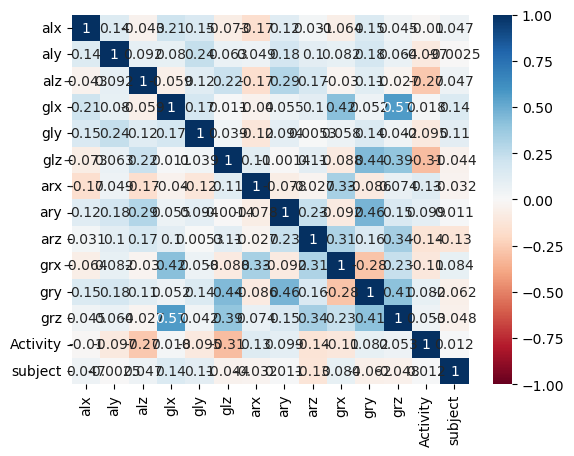

In [5]:
corr = ms.corr(method='spearman')
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(ms)
print(df_scaled)
print(df_scaled.shape)
df_scaled[:, 12] = df_scaled[:, 12] * 12

df_scaled = pd.DataFrame(df_scaled, columns = df.columns)
df_scaled['Activity'] = df_scaled['Activity'].astype(int)
display(df_scaled)
display(df_scaled.describe())
display(df_scaled["Activity"].unique())

[[0.55609159 0.24268539 0.40045468 ... 0.4935706  0.         1.        ]
 [0.58439155 0.16895787 0.3502115  ... 0.69405991 0.         0.        ]
 [0.53747239 0.24250801 0.47378696 ... 0.60025319 0.         0.66666667]
 ...
 [0.59529205 0.25765459 0.43096908 ... 0.64194475 0.41666667 0.        ]
 [0.58260291 0.20500123 0.12068224 ... 0.74495747 0.41666667 0.55555556]
 [0.55682795 0.20721853 0.34581627 ... 0.60945066 0.41666667 0.        ]]
(13000, 14)


,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,0.556092,0.242685,0.400455,0.695275,0.469088,0.441838,0.452144,0.241798,0.418837,0.705615,0.475036,0.493571,0,1.000000
1,0.584392,0.168958,0.350212,0.673672,0.469524,0.417374,0.426472,0.206065,0.466063,0.485947,0.543511,0.694060,0,0.000000
2,0.537472,0.242508,0.473787,0.684474,0.428314,0.565150,0.391418,0.263552,0.369239,0.619407,0.489776,0.600253,0,0.666667
3,0.583734,0.251835,0.479132,0.740754,0.477418,0.627557,0.457390,0.318644,0.534734,0.602167,0.556350,0.708162,0,0.555556
4,0.441609,0.254693,0.450341,0.399657,0.463388,0.764851,0.372815,0.443829,0.592080,0.281606,0.986221,0.684865,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12995,0.497423,0.369034,0.400041,0.597493,0.427001,0.534199,0.481975,0.628375,0.451412,0.437416,0.891114,0.668923,5,0.444444
12996,0.558778,0.103080,0.505053,0.687884,0.478731,0.395408,0.426820,0.217569,0.489986,0.791822,0.504043,0.494797,5,0.555556
12997,0.595292,0.257655,0.430969,0.646383,0.557208,0.525211,0.457424,0.273747,0.477816,0.587480,0.634811,0.641945,5,0.000000
12998,0.582603,0.205001,0.120682,0.787939,0.939058,0.814276,0.294598,0.335745,0.461543,0.463597,0.774137,0.744957,5,0.555556


,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
count,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000
mean,0.564983,0.258987,0.420901,0.539765,0.474414,0.574684,0.447562,0.327765,0.479423,0.498359,0.624155,0.552935,5.923077,0.498265
std,0.106714,0.131856,0.148135,0.143330,0.097533,0.140685,0.142118,0.160845,0.097184,0.177117,0.125955,0.150286,3.730714,0.320130
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.526848,0.233395,0.358191,0.397383,0.416916,0.460310,0.406772,0.230811,0.427509,0.346740,0.527342,0.430267,3.000000,0.222222
50%,0.556178,0.246041,0.445098,0.569067,0.444536,0.577633,0.470521,0.279347,0.467227,0.463597,0.581552,0.571438,6.000000,0.555556
75%,0.593030,0.298577,0.478801,0.662868,0.490569,0.697078,0.517696,0.422018,0.544244,0.638566,0.708040,0.687318,9.000000,0.777778
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000


array([ 0,  1,  2,  3,  4,  6,  8,  9, 10, 11, 12,  5])

In [7]:
# feature expansion magnitude of acceleration
df_scaled['Magnitude Acc'] = np.sqrt(df_scaled['alx']**2 + df_scaled['aly']**2 + df_scaled['alz']**2)
display(df_scaled.columns)
display(df_scaled.describe())

Index(['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx',
       'gry', 'grz', 'Activity', 'subject', 'Magnitude Acc'],
      dtype='object')

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject,Magnitude Acc
count,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000
mean,0.564983,0.258987,0.420901,0.539765,0.474414,0.574684,0.447562,0.327765,0.479423,0.498359,0.624155,0.552935,5.923077,0.498265,0.773680
std,0.106714,0.131856,0.148135,0.143330,0.097533,0.140685,0.142118,0.160845,0.097184,0.177117,0.125955,0.150286,3.730714,0.320130,0.124786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006679
25%,0.526848,0.233395,0.358191,0.397383,0.416916,0.460310,0.406772,0.230811,0.427509,0.346740,0.527342,0.430267,3.000000,0.222222,0.720529
50%,0.556178,0.246041,0.445098,0.569067,0.444536,0.577633,0.470521,0.279347,0.467227,0.463597,0.581552,0.571438,6.000000,0.555556,0.752261
75%,0.593030,0.298577,0.478801,0.662868,0.490569,0.697078,0.517696,0.422018,0.544244,0.638566,0.708040,0.687318,9.000000,0.777778,0.795366
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,1.600043


<Axes: >

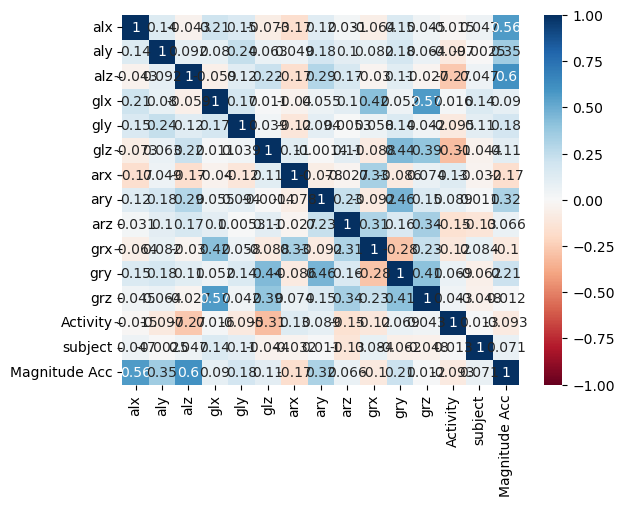

In [8]:
boo = df_scaled.corr(method='spearman')
sns.heatmap(boo, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_scaled.drop('Activity', axis = 1), df_scaled['Activity'], test_size=0.2, random_state=seed)

display(X_train.head())
display(y_train.head())

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,subject,Magnitude Acc
10970,0.557313,0.285524,0.302289,0.604314,0.447606,0.421369,0.017083,0.007979,0.715154,0.398463,0.657635,0.720426,0.111111,0.695341
12991,0.591810,0.250663,0.416241,0.441725,0.516434,0.641535,0.417968,0.261660,0.492332,0.438693,0.636237,0.412025,0.888889,0.765720
563,0.569657,0.218453,0.146628,0.532684,0.586142,0.355967,0.691303,0.413915,0.610370,0.652615,0.449354,0.527294,0.333333,0.627480
1905,0.557324,0.243469,0.472371,0.520746,0.408148,0.458312,0.461380,0.241335,0.467991,0.641757,0.474550,0.378917,0.555556,0.770079
5778,0.511387,0.244331,0.484226,0.379191,0.465141,0.774835,0.512234,0.198380,0.457177,0.397825,0.505945,0.513192,0.222222,0.745446


10970    11
12991     5
563       0
1905      1
5778      6
Name: Activity, dtype: int32

In [10]:
def GenerateReport(model):
    # Checking training error
    y_train_pred = model.predict(X_train)
    accuracy = accuracy_score(y_train, y_train_pred)
    conf_matrix = confusion_matrix(y_train, y_train_pred)
    class_report = classification_report(y_train, y_train_pred)

    # Printing accuracy, precision, and recall
    print("Train Accuracy:", accuracy)
    print("Train Classification Report:")
    print(class_report)

    # Checking testing error
    y_test_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    class_report = classification_report(y_test, y_test_pred)

    print("Test Accuracy:", accuracy)
    print("Test Classification Report:")
    print(class_report)

In [11]:
# We will now perform logistic regression with label encoding on the activities.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

log_reg_model = LogisticRegression(max_iter=1000)

# Fitting the model to the training data
log_reg_model.fit(X_train, y_train)

GenerateReport(log_reg_model)

Train Accuracy: 0.5440384615384616
Train Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.03      0.05       796
           1       0.48      0.51      0.50       804
           2       0.61      0.51      0.56       786
           3       0.91      1.00      0.96       792
           4       0.41      0.47      0.44       786
           5       0.44      0.27      0.34       819
           6       0.43      0.69      0.53      1605
           8       0.45      0.49      0.47       802
           9       0.76      0.86      0.81       786
          10       0.58      0.54      0.56       797
          11       0.63      0.66      0.64       806
          12       0.49      0.38      0.43       821

    accuracy                           0.54     10400
   macro avg       0.54      0.53      0.52     10400
weighted avg       0.53      0.54      0.52     10400

Test Accuracy: 0.5438461538461539
Test Classification Report:
       

In [15]:
from sklearn.svm import SVC

kernels = ['linear', 'rbf']
svm_models = {}
for kernel in kernels:
    print("Training Kernel: " + kernel)
    svm_models[kernel] = SVC(kernel=kernel)
    svm_models[kernel].fit(X_train, y_train)

    GenerateReport(svm_models[kernel])

Training Kernel: linear
Train Accuracy: 0.6352884615384615
Train Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.07      0.11       796
           1       0.57      0.87      0.69       804
           2       0.68      0.86      0.76       786
           3       0.98      1.00      0.99       792
           4       0.50      0.50      0.50       786
           5       0.50      0.35      0.41       819
           6       0.60      0.77      0.68      1605
           8       0.55      0.52      0.53       802
           9       0.93      0.87      0.90       786
          10       0.64      0.54      0.58       797
          11       0.64      0.77      0.70       806
          12       0.57      0.39      0.46       821

    accuracy                           0.64     10400
   macro avg       0.61      0.63      0.61     10400
weighted avg       0.61      0.64      0.61     10400

Test Accuracy: 0.6365384615384615
Test Classi

In [18]:
for degree in range(3, 7):
    print("Training polynomial degree " + str(degree))
    key = 'poly-' + str(degree)
    svm_models[key] = SVC(kernel=kernel, degree=degree)
    svm_models[key].fit(X_train, y_train)

    GenerateReport(svm_models[key])

Training polynomial degree 3
Train Accuracy: 0.8653846153846154
Train Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.32      0.46       796
           1       0.76      1.00      0.86       804
           2       0.94      1.00      0.97       786
           3       0.98      1.00      0.99       792
           4       0.76      0.88      0.82       786
           5       0.84      0.70      0.76       819
           6       0.82      0.97      0.89      1605
           8       0.86      0.72      0.79       802
           9       0.96      0.99      0.97       786
          10       0.89      0.91      0.90       797
          11       0.89      0.95      0.92       806
          12       0.93      0.84      0.88       821

    accuracy                           0.87     10400
   macro avg       0.87      0.86      0.85     10400
weighted avg       0.87      0.87      0.85     10400

Test Accuracy: 0.8653846153846154
Test C